In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

## Task 1

Consider n-dimensional feature vectors coming from two classes. Assume that the distributions of the feature vectors 
for the two classes are (known) normal distributions and that the priors for the classes P(w1) and P(w2) are also 
known. You can select your own mean, (co-)variance, and prior. Put enough text, graphs, tables if necessary, to 
guarantee a good readability and completeness.  

**Write a computer program that classifies the feature vectors according to Bayes decision rule. Generate some artificial (normally distributed) data, and test your program on the data you generated. Try feature vectors of various
dimensions (at least two different dimensions, e.g., 1-dim and 3-dim)**

and

**Quantify the accuracy of your results.**

### 1-dim case:
    - If we assume two actions: take class 1 or take class 2
    - Don't consider the risk of different actions right now

In [2]:
# define the parameters
num_sample = 1000

Pw1 = 0.4
mean_w1 = 0
sd_w1 = 5

Pw2 = 0.6
mean_w2 = 5
sd_w2 = 1

In [3]:
# Generating sample points
Xs = np.linspace(start=-16, stop=16, num=num_sample)
Xw1_pdf = norm.pdf(Xs, loc=mean_w1, scale=sd_w1)
Xw2_pdf= norm.pdf(Xs, loc=mean_w2, scale=sd_w2)

Xw1 = norm.rvs(size=num_sample, loc=mean_w1, scale=sd_w1)
Xw2= norm.rvs(size=num_sample, loc=mean_w2, scale=sd_w2)

In [4]:
# # Drawing histogram and PDF for W1&W2
# count_w1, bins_w1, ignored_w1 = plt.hist(Xw1, int(num_sample/10), density=True)
# count_w2, bins_w2, ignored_w2 = plt.hist(Xw2, int(num_sample/10), density=True)
# P_likelihood_w1 = 1/(sd_w1*np.sqrt(2*np.pi)) * np.exp(-(bins_w1-mean_w1)**2 / (2*sd_w1**2))
# P_likelihood_w2 = 1/(sd_w2*np.sqrt(2*np.pi)) * np.exp(-(bins_w2-mean_w2)**2 / (2*sd_w2**2))
# plt.plot(bins_w1, P_likelihood_w1, label='W1', linewidth=2, color='b')
# plt.plot(bins_w2, P_likelihood_w2, label='W2', linewidth=2, color='g')
# plt.legend(loc='upper right')
# plt.title("Hist for two classes' likelihood and their density graph")
# plt.show()
# plt.close()
# 
# count_w1, bins_w1, ignored_w1 = plt.hist(Xw1, int(num_sample-1), density=True)
# plt.close()
# 
# P_likelihood_w1 = 1/(sd_w1*np.sqrt(2*np.pi)) * np.exp(-(bins_w1-mean_w1)**2 / (2*sd_w1**2))
# P_likelihood_w2 = 1/(sd_w2*np.sqrt(2*np.pi)) * np.exp(-(bins_w1-mean_w2)**2 / (2*sd_w2**2))
# P_product_w1 = P_likelihood_w1*Pw1
# P_product_w2 = P_likelihood_w2*Pw2
# 
# P_posterior_w1 = P_product_w1 / (P_product_w1 + P_product_w2)
# P_posterior_w2 = P_product_w2 / (P_product_w1 + P_product_w2)
# 
# plt.plot(bins_w1, P_posterior_w1, color='b', label='W1')
# plt.plot(bins_w1, P_posterior_w2, label="W2")
# plt.title("posterior probabilities")
# plt.legend()
# plt.show()
# plt.close()

- Hist and PDF curves

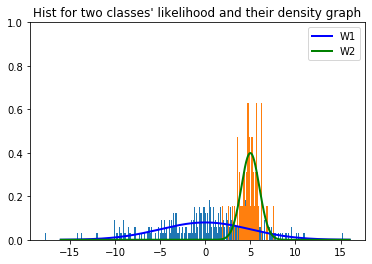

In [5]:
plt.hist(Xw1, num_sample, density=True)
plt.hist(Xw2, num_sample, density=True)
plt.plot(Xs, Xw1_pdf, label='W1', linewidth=2, color='b')
plt.plot(Xs, Xw2_pdf, label='W2', linewidth=2, color='g')
plt.legend(loc='upper right')
plt.ylim([0, 1])
plt.title("Hist for two classes' likelihood and their density graph")
plt.show()
plt.close()

- Priors and Sample Distribution


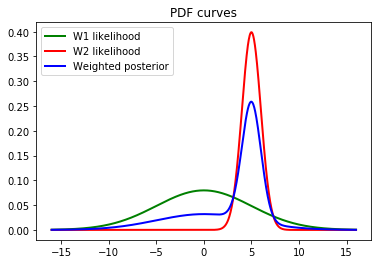

In [6]:
X_pdf = Xw1_pdf*Pw1 +Xw2_pdf*Pw2
plt.plot(Xs, Xw1_pdf, label='W1 likelihood', linewidth=2, color='g')
plt.plot(Xs, Xw2_pdf, label='W2 likelihood', linewidth=2, color='r')
plt.plot(Xs, X_pdf, label='Weighted posterior', linewidth=2, color='b')
plt.title("PDF curves")
plt.legend()
plt.show()
plt.close()

- Posterior Distributions

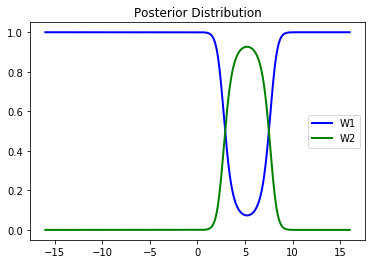

In [7]:
P_posterior_w1 = Xw1_pdf*Pw1 / X_pdf
P_posterior_w2 = Xw2_pdf*Pw2 / X_pdf

plt.plot(Xs, P_posterior_w1, label='W1', linewidth=2, color='b')
plt.plot(Xs, P_posterior_w2, label='W2', linewidth=2, color='g')
plt.title("Posterior Distribution")
plt.legend()
plt.show()
plt.close()


- Error Computation

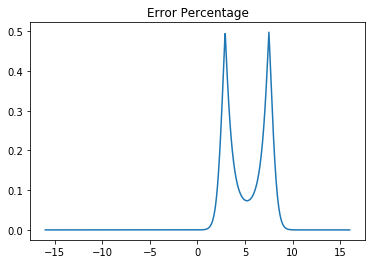

Error Rate:  0.10015416323326713


In [8]:
P_error = 1 - np.maximum(P_posterior_w1, P_posterior_w2)
plt.plot(Xs, P_error)
plt.title("Error Percentage")
plt.show()
plt.close()
print("Error Rate: ", np.sum(P_error*X_pdf) / np.sum(X_pdf))


In [9]:
# ![title](1.jpg)
# - as we can see, the point $c$ that $f_1(x)= f_2(s)$ is:
# $$c = {{\mu_2\sigma_1^2-\sigma_2(\mu_1\sigma_2+\sigma_1\sqrt{(\mu_1-\mu_2)^2+2(\sigma_1^2-\sigma_2^2)\log({{\sigma_1}\over{\sigma_2}})})} \over {\sigma_1^2-\sigma_2^2}}$$

### 2-dim case:
    - If we assume two actions: take class 1 or take class 2
    - Don't consider the risk of different actions right now

In [10]:
# define the parameters
num_sample = 60
Pw1 = 0.4
Pw2 = 0.6
means = np.array([1, 3])
covs = np.diag([5, 4])

In [11]:
# Generating sample points
Xs, Ys = np.meshgrid(np.linspace(-6,6,num_sample), np.linspace(-6,6,num_sample))
XYs = np.array([Xs, Ys]).T.reshape(num_sample**2, 2)

def norm2D_pdf(x, mu=np.zeros(2), sigma=np.eye(2)):
    return ((2*np.pi)**len(mu)*np.linalg.det(sigma))**(-.5) * np.exp(-.5*np.dot(x-mu,np.dot(np.linalg.inv(sigma),x-mu)))

- 2 features' PDF hot image

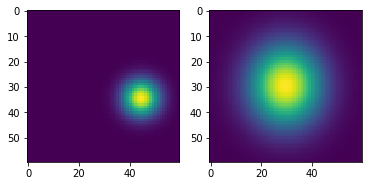

In [12]:
P_likelihood_w1 = np.array([norm2D_pdf(x, mu=means) for x in XYs]).reshape(Xs.shape)
P_likelihood_w2 = np.array([norm2D_pdf(x, sigma=covs) for x in XYs]).reshape(Ys.shape)
plt.subplot(1,2,1);plt.imshow(P_likelihood_w1)
plt.subplot(1,2,2);plt.imshow(P_likelihood_w2)

- Weighted likelihood PDF hot image

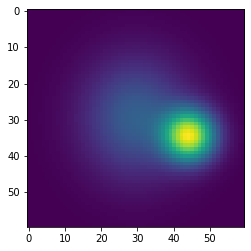

In [13]:
P_likelihood_X = P_likelihood_w1*Pw1 + P_likelihood_w2*Pw2
plt.imshow(P_likelihood_X)

- Draw the sample distribution in 3D

(0, 0.1)

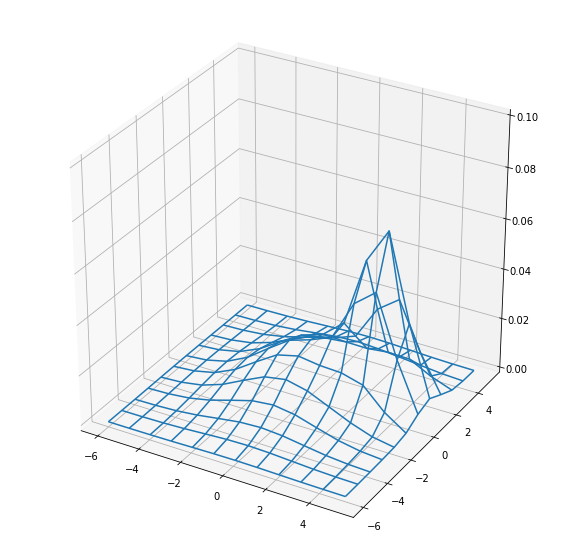

In [30]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_wireframe(Xs[::5,::5],Ys[::5,::5], P_likelihood_X[::5,::5])
# ax.plot_wireframe(Xs[::num_sample,::num_sample],Ys[::num_sample,::num_sample], P_X_likelihood[::num_sample,::num_sample])
ax.set_zlim3d(0, 0.1)

- Get the posterior distributions

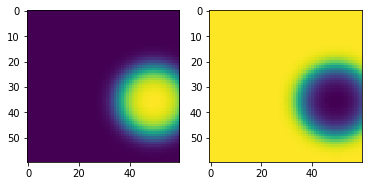

In [31]:
P_posterior_w1 = P_likelihood_w1*Pw1 / P_likelihood_X
P_posterior_w2 = P_likelihood_w2*Pw2 / P_likelihood_X
plt.subplot(1,2,1);plt.imshow(P_posterior_w1)
plt.subplot(1,2,2);plt.imshow(P_posterior_w2)

- Draw the 3D posterior img

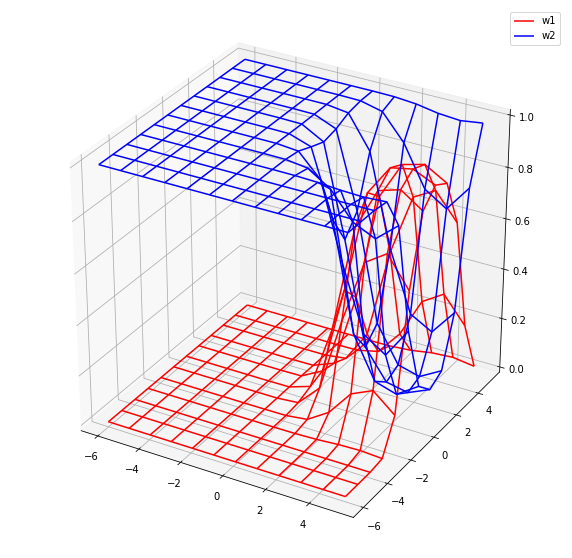

In [32]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_wireframe(Xs[::5,::5] ,Ys[::5,::5], P_posterior_w1[::5,::5], color='r', label="w1")
ax.plot_wireframe(Xs[::5,::5], Ys[::5,::5], P_posterior_w2[::5,::5], color='b', label="w2")
ax.set_zlim3d(0, 1)
ax.legend()

- Error Computation

Error Rate:  0.1160498319171191


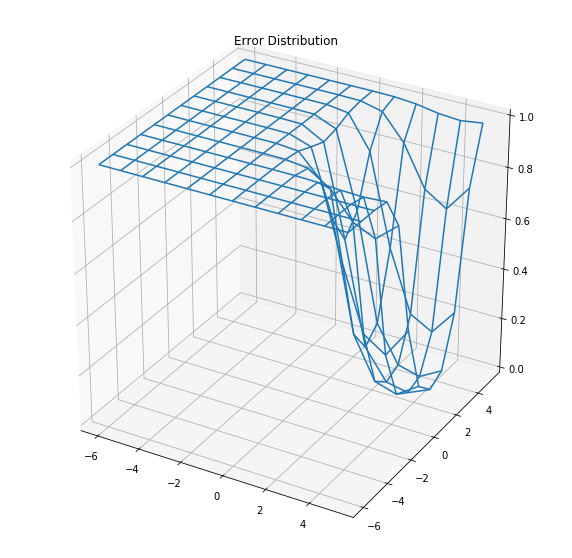

In [39]:
P_error =  1- np.maximum(P_posterior_w1, P_posterior_w2)
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_wireframe(Xs[::5,::5],Ys[::5,::5], 1- np.maximum(P_posterior_w1[::5,::5], P_error[::5,::5]))
plt.title("Error Distribution")
ax.set_zlim3d(0, 1)
print("Error Rate: ", np.sum(P_error*P_likelihood_X) / np.sum(P_likelihood_X))

**How does the dimension of the feature vectors affect accuracy?**

- While other hyper-parameters fixed, adding mode features won't improve classifier's accuracy.
- Beyond formula also give us the intuition, the decision is not based on the x, but on the **loss of actions**, and **prior probabilitise**.

$${{P(x|W_1)}\over{P(x|W_2)}} > {{{\lambda_{1,2}-\lambda_{2,2}}\over{\lambda_{2,1}-\lambda_{1,1}}}\cdot{{P(W_2)}\over{P(W_1)}}}$$

## Task 2

Take the data (e.g., 1-dim feature case) you used for Question 1.

**Use maximum likelihood estimation to estimate the parameters of the feature distribution (i.e., μ and ∑ of the conditional distribution for each class)**

In [2]:
# define the parameters
num_sample = 1000

Pw1 = 0.4
mean_w1 = 0
sd_w1 = 5

Pw2 = 0.6
mean_w2 = 5
sd_w2 = 1

# Generating sample points
Xs = np.linspace(start=-16, stop=16, num=num_sample)
Xw1_pdf = norm.pdf(Xs, loc=mean_w1, scale=sd_w1)
Xw2_pdf= norm.pdf(Xs, loc=mean_w2, scale=sd_w2)

Xw1 = norm.rvs(size=num_sample, loc=mean_w1, scale=sd_w1)
Xw2= norm.rvs(size=num_sample, loc=mean_w2, scale=sd_w2)

**Study the ‘number of samples used for parameter estimation V.S. the parameters estimated’.**

In [3]:
mean_w1_mle_list = []
sd_w1_mle_list = []
mean_w2_mle_list = []
sd_w2_mle_list = []
idx_list = [5, 10, 20, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

for idx_end in idx_list:
    Xw1_cur = Xw1[:idx_end]
    Xw2_cur = Xw2[:idx_end]
    
    mean_w1_mle, sd_w1_mle = norm.fit(Xw1_cur)
    mean_w2_mle, sd_w2_mle = norm.fit(Xw2_cur)
    
    mean_w1_mle_list.append(mean_w1_mle)
    sd_w1_mle_list.append(sd_w1_mle)
    mean_w2_mle_list.append(mean_w2_mle)
    sd_w2_mle_list.append(sd_w2_mle)
    
    del Xw1_cur, Xw2_cur, mean_w1_mle, sd_w1_mle, mean_w2_mle, sd_w2_mle
    

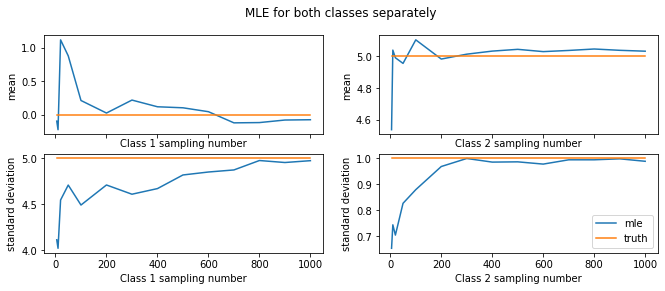

In [4]:
# draw the plots
fig, axes = plt.subplots(2,2, sharex=True, figsize=(11,4))
axes[0,0].plot(idx_list, mean_w1_mle_list, label='mle')
axes[0,0].plot(idx_list, [mean_w1 for i in range(len(idx_list))], label='truth')
plt.setp(axes[0,:], ylabel="mean")
axes[1,0].plot(idx_list, sd_w1_mle_list, label='mle')
axes[1,0].plot(idx_list, [sd_w1 for i in range(len(idx_list))], label='truth')
plt.setp(axes[:,0], xlabel="Class 1 sampling number")
axes[0,1].plot(idx_list, mean_w2_mle_list, label='mle')
axes[0,1].plot(idx_list, [mean_w2 for i in range(len(idx_list))], label='truth')
plt.setp(axes[1,:], ylabel="standard deviation")
axes[1,1].plot(idx_list, sd_w2_mle_list, label='mle')
axes[1,1].plot(idx_list, [sd_w2 for i in range(len(idx_list))], label='truth')
plt.setp(axes[:,1], xlabel="Class 2 sampling number")
plt.suptitle("MLE for both classes separately")
plt.legend()

**Experiment to illustrate the accuracy of this classifier obtained with this estimate.**

- as we recall, the true distribution is:

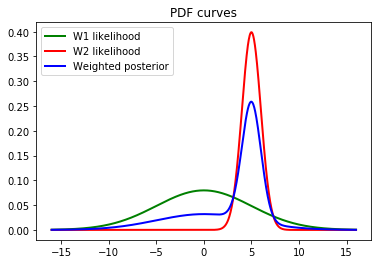

In [5]:
X_pdf = Xw1_pdf*Pw1 +Xw2_pdf*Pw2
plt.plot(Xs, Xw1_pdf, label='W1 likelihood', linewidth=2, color='g')
plt.plot(Xs, Xw2_pdf, label='W2 likelihood', linewidth=2, color='r')
plt.plot(Xs, X_pdf, label='Weighted posterior', linewidth=2, color='b')
plt.title("PDF curves")
plt.legend()
plt.show()
plt.close()

In [6]:
def draw_fig_according_to_sample_number(idx,
                                        idx_list=idx_list,
                                        mean_w1_mle_list=mean_w1_mle_list,
                                        sd_w1_mle_list=sd_w1_mle_list,
                                        mean_w2_mle_list=mean_w2_mle_list,
                                        sd_w2_mle_list=sd_w2_mle_list):
    n_sample = idx_list[idx]
    mean_w1_mle, sd_w1_mle = mean_w1_mle_list[idx], sd_w1_mle_list[idx]
    mean_w2_mle, sd_w2_mle = mean_w2_mle_list[idx], sd_w2_mle_list[idx]
    
    Xw1_mle_likelihood_pdf = norm.pdf(Xs, loc=mean_w1_mle, scale=sd_w1_mle)
    Xw2_mle_likelihood_pdf = norm.pdf(Xs, loc=mean_w2_mle, scale=sd_w2_mle)
    
    Xw1_mle_posterior_pdf = Xw1_mle_likelihood_pdf*Pw1
    Xw2_mle_posterior_pdf = Xw2_mle_likelihood_pdf*Pw2
    X_mle_posterior_pdf = Xw1_mle_posterior_pdf + Xw2_mle_posterior_pdf
    
    plt.plot(Xs, X_pdf, label='truth posterior', linewidth=2, color='b')
    plt.plot(Xs, X_mle_posterior_pdf, label='mle posterior', linewidth=2, color='r')
    plt.title(f"Sample Number: {n_sample}")
    plt.legend()
    plt.show()
    plt.close()
    print("--------------------------------------------------------------------------------------------")
    P_error = 1 - np.maximum(X_mle_posterior_pdf, Xw2_mle_likelihood_pdf)
    plt.plot(Xs, P_error)
    plt.title("Error Percentage")
    plt.show()
    plt.close()
    print("Error Rate: ", np.sum(P_error*X_pdf) / np.sum(X_pdf))

- Comparing different number of samples

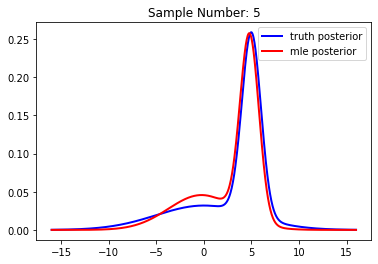

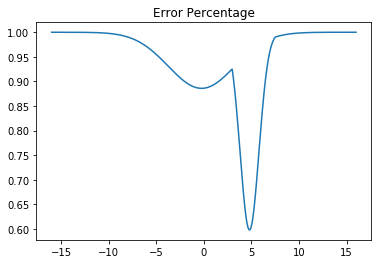

Error Rate:  0.7893465341461052
#############################################################################################
#############################################################################################
Error Rate:  0.7809725120957447
#############################################################################################
#############################################################################################
Error Rate:  0.7894091279128053
#############################################################################################
#############################################################################################
Error Rate:  0.8017404039111772
#############################################################################################
#############################################################################################
Error Rate:  0.7957733716711762
########################################################################################

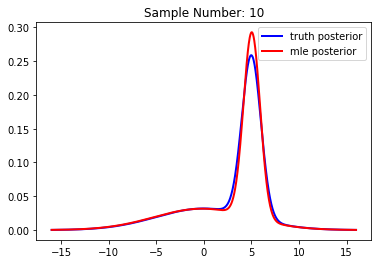

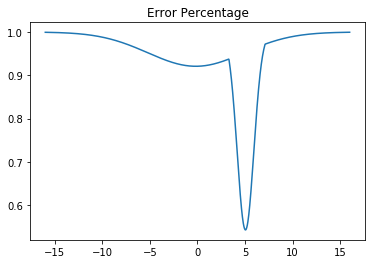

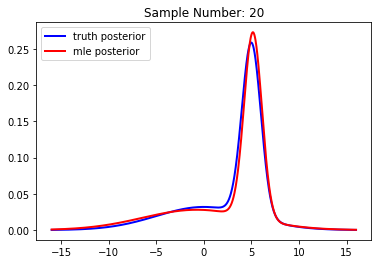

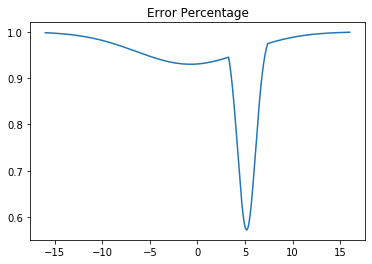

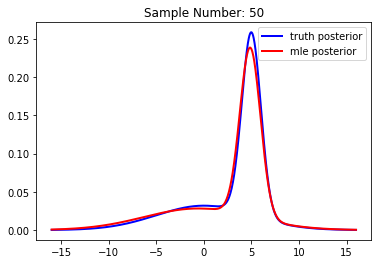

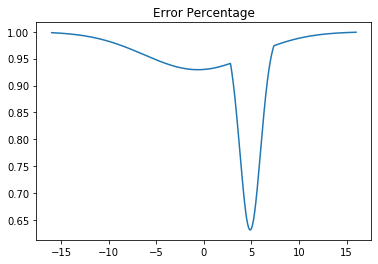

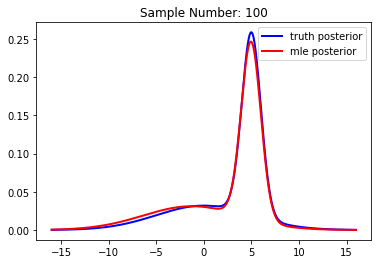

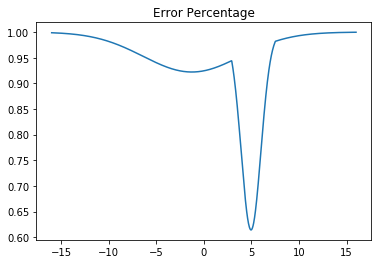

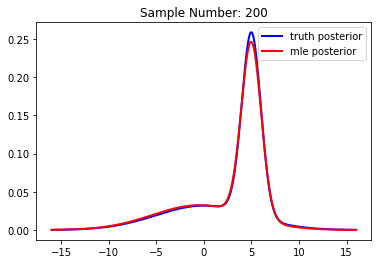

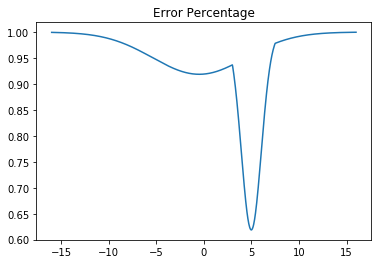

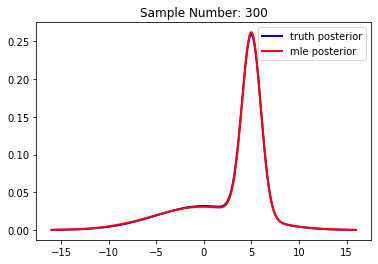

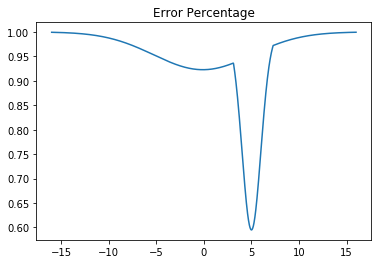

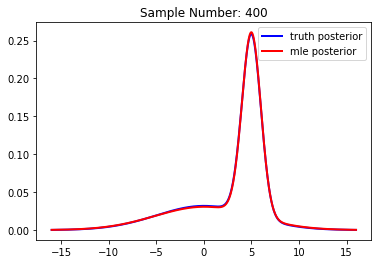

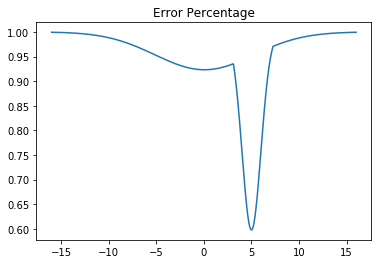

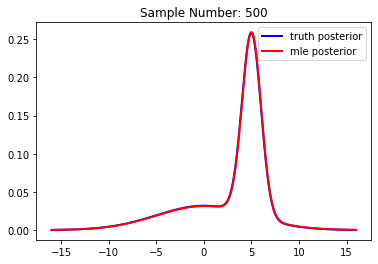

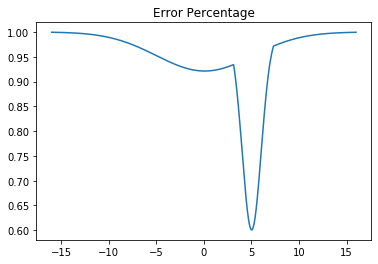

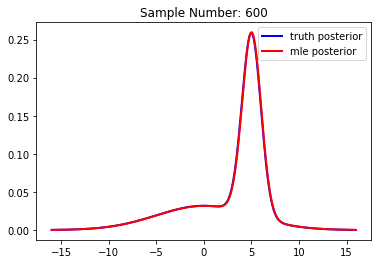

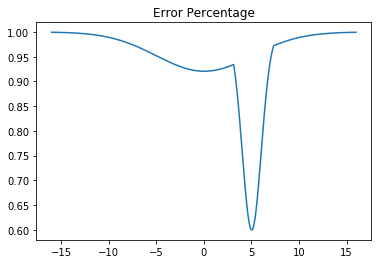

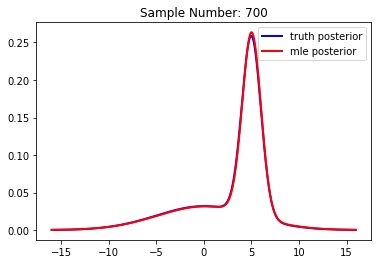

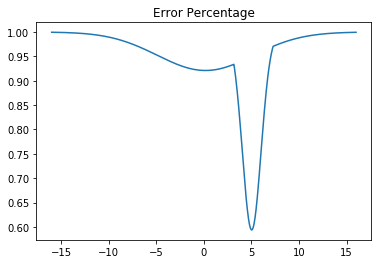

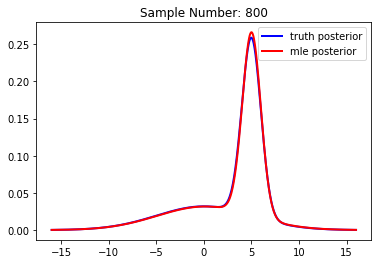

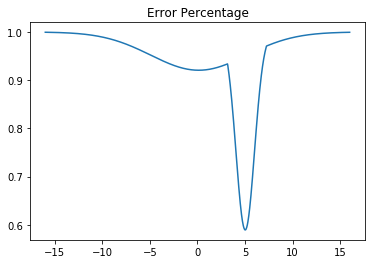

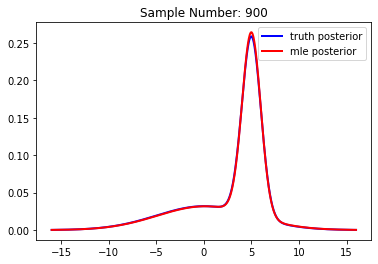

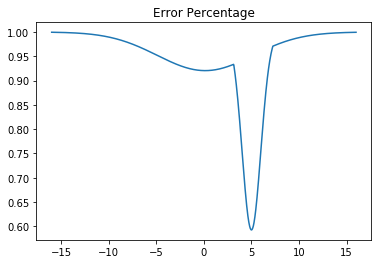

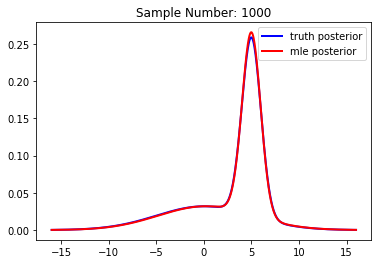

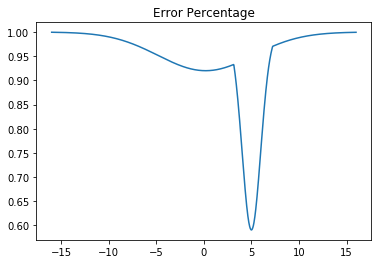

In [7]:
# way too slow
for idx in range(len(idx_list)):
    print("#############################################################################################")
    draw_fig_according_to_sample_number(idx)  
    print("#############################################################################################")
    

- 20 samples

In [ ]:
# draw_fig_according_to_sample_number(2)

- 50 samples

In [ ]:
# draw_fig_according_to_sample_number(3)

- 100 samples

In [ ]:
# draw_fig_according_to_sample_number(4)

- 500 samples

In [ ]:
# draw_fig_according_to_sample_number(8)

- all samples

In [ ]:
# draw_fig_according_to_sample_number(13)

**Study the ‘number of samples used for parameter estimation V.S. the classification accuracy’.**


## Task 3

Take the data (e.g., 1-dim feature case) you used for Question 1.

**Use 
Bayesian parameter estimation to estimate the parameters (μ unknown, variance known) of the featuredistribution (i.e.,   the conditional distribution for each class).  Assume P(θ)  is approximately flat and known Gaussian
distribution, respectively.**

**Study the ‘
number of samples used for parameter estimation V.S. the 
parameter
μ
 estimated’**

**Experiment to illustrate the accuracy of this
 classifier obtained with this estimate.**

**Study the ‘
number of samples used for parameter estimation V.S. the 
classification accuracy
’.**